In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define NACA 4 airfoils

In [10]:

# https://stackoverflow.com/questions/31815041/plotting-a-naca-4-series-airfoil
# From wikipedia:
# #https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
# Example NACA 4:
# NACA2412 airfoil uses a 2% camber (first digit) 40% (second digit) along the chord of a
# 0012 symmetrical airfoil having a thickness 12% (digits 3 and 4) of the chord

# Functions to determine (x, y) coordinates of NACA 4 airfoils

def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

def naca4(x, m, p, t, c=1):
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)
    return ((x - yt*np.sin(th), yc + yt*np.cos(th)),
            (x + yt*np.sin(th), yc - yt*np.cos(th)))


In [11]:
# List of NACA*412 foils
# for camber = 0.01, 0.02, ... 0.06

p = 0.4
t = 0.12
c = 1.0
x = np.linspace(0,1,200)

foils = []
foils.append(naca4(x, .01, p, t, c))
foils.append(naca4(x, .02, p, t, c))
foils.append(naca4(x, .03, p, t, c))
foils.append(naca4(x, .04, p, t, c))
foils.append(naca4(x, .05, p, t, c))
foils.append(naca4(x, .06, p, t, c))
foils.append(naca4(x, .07, p, t, c))
foils.append(naca4(x, .08, p, t, c))

# Plot Airfoils

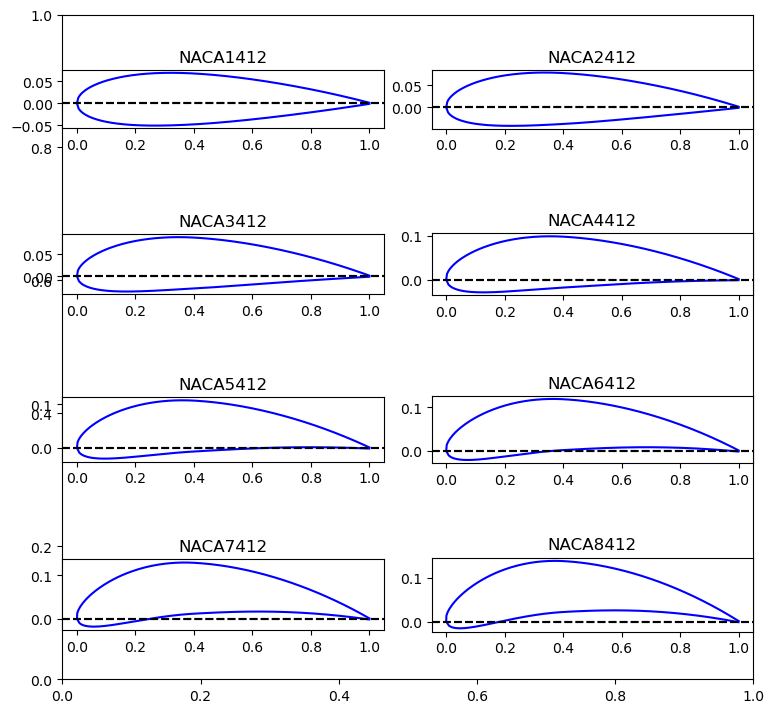

In [12]:
import warnings
warnings.filterwarnings("ignore")

i = 1
fig, ax = plt.subplots(figsize=(8,7))

for foil in foils:
  for item in foil:
    plt.subplot(4,2,i, aspect = 1.5)
    plt.plot(item[0], item[1], 'b')
    plt.plot([-.05,1.05],[0,0],'k--')
    plt.xlim((-0.05, 1.05))
    plt.title("NACA" + str(i) + "412")
  i+=1

fig.tight_layout(pad=.5)

# Perimeter Analysis
Perimeters of Airfoils should be approximately the same

In [13]:
def perimeter(foil):
  p = 0
  for coordinates in foil:
    x, y = coordinates

    # Add the distances between each coodinate (x_i, y_i) and (x_(i+1), y_(i+1))
    p = p + np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))

  return p

In [14]:
plist = []
for foil in foils:
  p = perimeter(foil)
  plist.append(p)

rel_perimeter_diff = (max(plist) - min(plist))/min(plist)
print("Estimate in maximum relative difference in perimeter = ", rel_perimeter_diff)

Estimate in maximum relative difference in perimeter =  0.01617408881459614


In [15]:
datadir = "./outputs/"

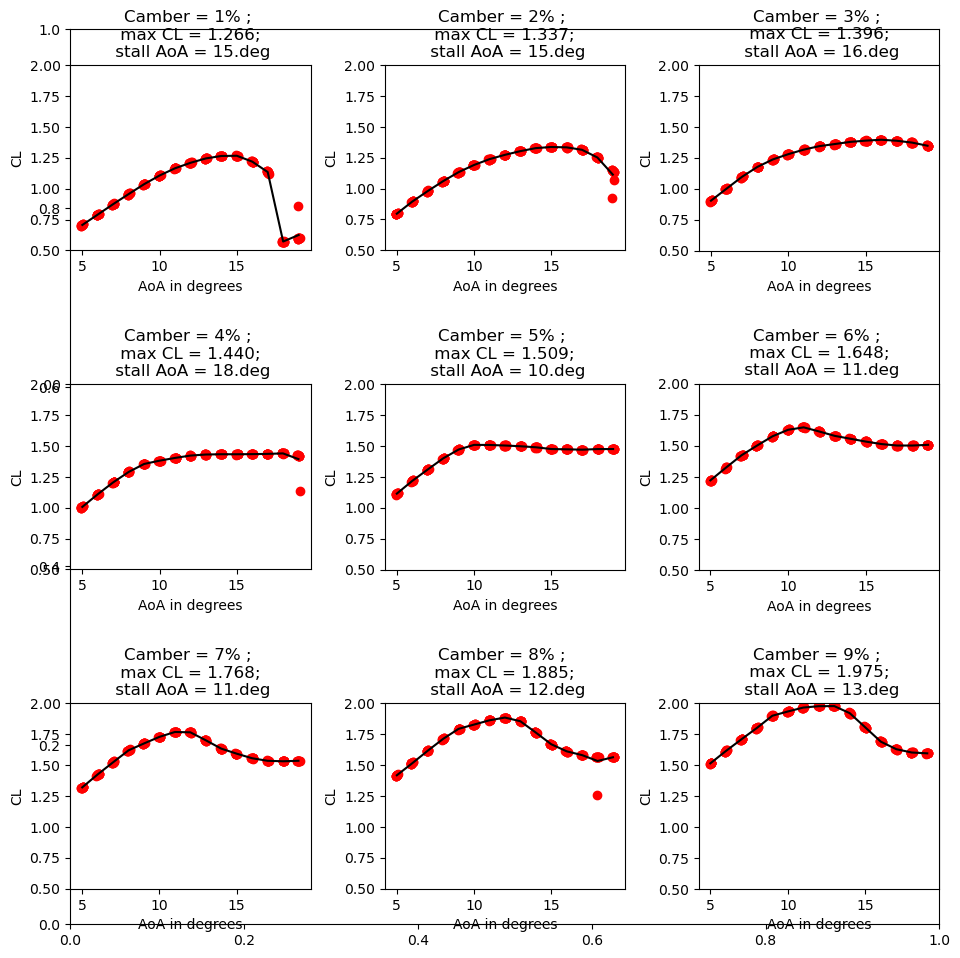

In [16]:
def load_camber(files):
  dat = pd.read_csv(file)
  camber = np.zeros((10,3))
  for i, file in enumerate(files):
    dat = pd.read_csv(file)
    camber[i,0] = i
    camber[i,1] = np.mean(dat["CL"])
    camber[i,2] = np.se(dat["CL"])
    return camber



alphas = np.arange(5.0, 20.0, 1.0, dtype = float)
n_alphas = len(alphas)
CL = np.zeros((n_alphas,4))
CL_max = np.zeros((9,3))
CL_5 = np.zeros((9,3))
NACAs = ["1412", "2412", "3412", "4412", "5412", "6412", "7412", "8412", "9412"]

fig, ax = plt.subplots(figsize=(10,10))


for j, naca in enumerate(NACAs):
  plt.subplot(3,3,j+1, aspect = 8)

  for i, alpha in enumerate(alphas):

    file = datadir + 'NACA ' + naca + '/' + str(int(alpha)) + '.csv'
    dat = pd.read_csv(file)
    plt.plot(dat["Alpha"],dat["CL"],'ro')
    CL[i,0] = alpha
    CL[i,1] = np.mean(dat["CL"])
    CL[i,2] = np.max(dat["CL"]) - np.min(dat["CL"])


  x = CL[:,0]
  y = CL[:,1]
  idx = np.argmax(y)
  CL_max[j,0] = j+1
  CL_max[j,1] = y[idx]
  CL_max[j,2] = CL[idx,2]
  lo = CL[:,2]
  hi = CL[:,3]

  CL_5[j,0] = j+1
  CL_5[j,1] = y[1]
  CL_5[j,2] = CL[1,2]

  cm = np.format_float_positional(y[idx],3)
  am = np.format_float_positional(x[idx])

  plt.plot(x,y, 'k')
  #plt.plot(x,y, 'ro')
  # plt.fill_between(x, lo, hi, color='b', alpha=.15)
  plt.title("Camber = " + str(j+1) + "% ; \n max CL = " + cm + "; \n stall AoA = " + am + "deg")
  plt.ylim((.5,2.0))
  plt.xlabel("AoA in degrees")
  plt.ylabel("CL")

fig.tight_layout(pad=1)


Text(0.5, 1.0, 'Maximum Coeffient of Lift vs Camber')

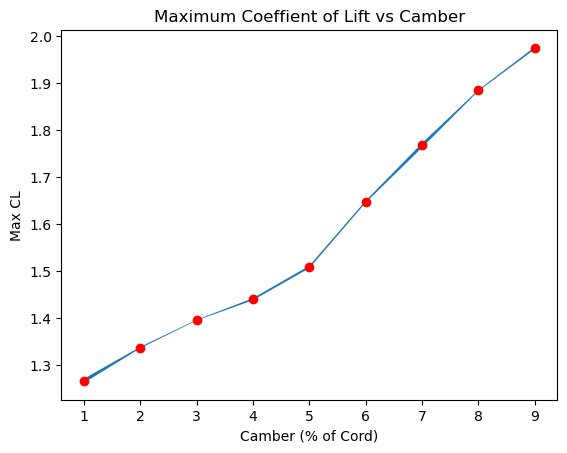

In [17]:
delta = CL_max[:, 2]
#plt.plot(CL_max[:,0], CL_max[:,1], 'k')
#plt.plot(CL_max[:,0], CL_max[:,1], 'ro')
plt.fill_between(CL_max[:,0], CL_max[:,1] - delta, CL_max[:,1] + delta)
plt.plot(CL_max[:,0], CL_max[:,1], 'ro')
plt.xlabel("Camber (% of Cord)")
plt.ylabel("Max CL")
plt.title("Maximum Coeffient of Lift vs Camber")

Text(0.5, 1.0, 'Maximum Coeffient of Lift vs Camber')

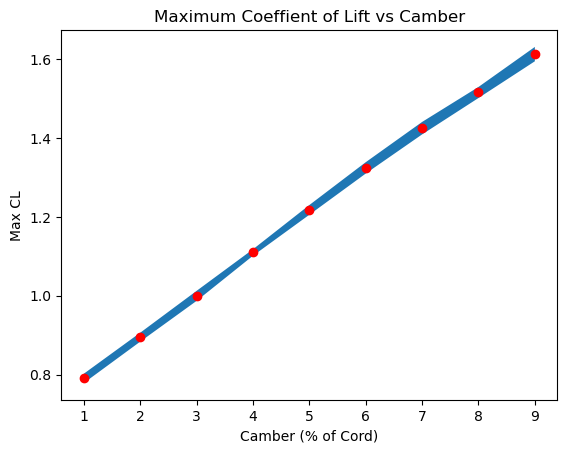

In [18]:
delta = CL_5[:, 2]
#plt.plot(CL_5[:,0], CL_5[:,1], 'k')
#plt.plot(CL_5[:,0], CL_5[:,1], 'ro')
plt.fill_between(CL_5[:,0], CL_5[:,1] - delta, CL_5[:,1] + delta)
plt.plot(CL_5[:,0], CL_5[:,1], 'ro')
plt.xlabel("Camber (% of Cord)")
plt.ylabel("Max CL")
plt.title("Maximum Coeffient of Lift vs Camber")

In [19]:
from tabulate import tabulate

m = np.array([[1, 2, 3], [4, 5, 6]])
headers = ["Camber \n (% of Chord)", "Max CL", "Uncertainty"]

CL_max = np.round(1000*CL_max)/1000
# Generate the table in fancy format.
table = tabulate(CL_max, headers, tablefmt="fancy_grid")

# Show it.
print(table)

╒═════════════════╤══════════╤═══════════════╕
│         Camber  │   Max CL │   Uncertainty │
│    (% of Chord) │          │               │
╞═════════════════╪══════════╪═══════════════╡
│               1 │    1.266 │         0.004 │
├─────────────────┼──────────┼───────────────┤
│               2 │    1.337 │         0.002 │
├─────────────────┼──────────┼───────────────┤
│               3 │    1.396 │         0.001 │
├─────────────────┼──────────┼───────────────┤
│               4 │    1.44  │         0.002 │
├─────────────────┼──────────┼───────────────┤
│               5 │    1.509 │         0.003 │
├─────────────────┼──────────┼───────────────┤
│               6 │    1.648 │         0.002 │
├─────────────────┼──────────┼───────────────┤
│               7 │    1.768 │         0.005 │
├─────────────────┼──────────┼───────────────┤
│               8 │    1.885 │         0.001 │
├─────────────────┼──────────┼───────────────┤
│               9 │    1.975 │         0.002 │
╘════════════